1)Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?

Ans:Credit card is very important in today's world for customers with increasing demands of customers and credit cards offers alot of benefits. Banks receive a lot of credit card applications. Many of the applications do not get approved for a variety of reasons, like increased loan balances or poor-income levels. CIBIL score and other things like income,education qualification and other factors are checked before giving the credit card so that the risk of banks are decreased. Manually analyzing these applications can be very time-consuming and full of human errors. To help streamline the application process and improve the approval rate, machine learning models can be used to predict credit card approval. In this project, we will explore how various factors affect credit card approval rates and use predictive models to improve the accuracy of credit card approval predictions.

2) How is it going to impact the banking sector?

Ans:predicting a good client is crucial for a bank's success in today's world as it directly impacts risk management, profitability, customer relationships, resource allocation, competitive positioning, compliance, and the integration of advanced technologies.
1)Risk Management: Banks operate in a highly regulated environment, and managing risk is a top priority. Predicting the creditworthiness of a client helps in assessing the risk associated with lending money. This is particularly important to avoid non-performing loans, which can have severe financial implications for the bank.

2)Profitability: Identifying good clients allows banks to focus their resources on individuals or businesses with a high likelihood of repaying loans. This, in turn, enhances the overall profitability of the bank.

3)Customer Relationship Management: Accurate predictions about a client's creditworthiness enable banks to offer tailored financial products and services. This enhances customer satisfaction and loyalty, as clients are more likely to engage with a bank that understands their financial needs and provides appropriate solutions.

4)Competitive Advantage: In a competitive banking landscape, the ability to accurately predict good clients provides a significant competitive advantage. Banks that can offer more attractive interest rates, favorable terms, and quicker approvals based on robust predictive models are likely to attract a larger customer base. Compliance and Regulatory Requirements:

5)Compliance and Regulatory Requirements: Regulatory bodies often require banks to adhere to strict lending standards. Accurate predictions of a client's creditworthiness help banks stay compliant with these regulations, avoiding legal issues and potential penalties.

3) If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

Ans:While the proposed methods and technologies for predicting good clients in the banking sector have significant potential benefits, there may be certain challenges or gaps in their application, particularly in the context of banks in India. Some considerations include:

i)Data Quality and Availability The effectiveness of predictive models relies heavily on the quality and availability of data. In India, there might be challenges related to the completeness and accuracy of financial data, especially for individuals or businesses in rural or underbanked areas. Improving data infrastructure and accessibility is crucial for enhancing the accuracy of predictive models.

ii)Lack of Credit History A significant portion of the population in India may not have a well-established credit history. Traditional credit scoring models heavily rely on credit histories, and adapting or developing alternative scoring mechanisms becomes essential to assess the creditworthiness of individuals without a robust credit background.

iii)Technology Adoption and Security Concerns: The adoption of advanced technologies, such as machine learning and artificial intelligence, may face resistance or challenges in terms of understanding and acceptance. Additionally, ensuring the security and privacy of sensitive financial data is paramount, and banks need to invest in robust cybersecurity measures to address potential concerns.

In [343]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pt
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import duckdb as db
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import ttest_ind

from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

In [344]:
#reading both files
df1=pd.read_csv('/content/Credit_card.csv')
df2=pd.read_csv('/content/Credit_card_label.csv')

In [345]:
#merging both the files on column Ind_ID to make a single dataframe
merged_df = pd.merge(df1, df2, on='Ind_ID')

In [346]:
#find the shape of dataframe df1
df1.shape

(1548, 18)

In [347]:
#find the shape of dataframe df2
df2.shape


(1548, 2)

In [348]:
#find the shape of merged dataframe
merged_df.shape

(1548, 19)

In [349]:
#finding the mathematical relation of dataframe
merged_df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [350]:
#Finding top 5 values of dataframe
merged_df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [351]:
#finding last 5 values of dataframe
merged_df.tail(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [352]:
#finding null values of dataframe
merged_df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [353]:
#Renaming the columns using dataframe.rename which I felt had spelling mistake and making every column in proper lower case.
merged_df= merged_df.rename(columns={'Propert_Owner':'Property_Owner','Ind_ID':'Ind_id', 'GENDER': 'Gender', 'CHILDREN': 'Children', 'EDUCATION': 'Education', 'EMAIL_ID':'Email_id','Birthday_count': 'Age','Employed_days':'Employee_exp'})

In [354]:
#converting negative value to experience of employees
merged_df['Employee_exp']=abs(round((merged_df['Employee_exp']/-365),0))

In [355]:
##converting negative value to actual age
merged_df['Age']=abs(round((merged_df['Age']/-365),0))

In [356]:
#finding the information about data types of dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employee_exp     1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

<Axes: >

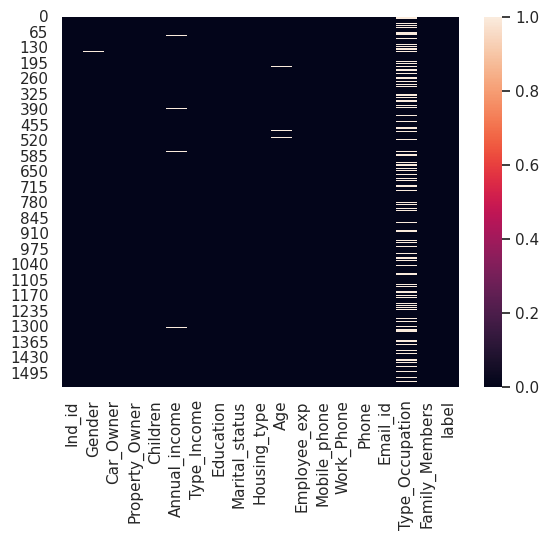

In [357]:
#mapping heatmap of null values of dataframe
sns.heatmap(merged_df.isnull())

In [358]:
#filling missing values with mean
merged_df.fillna(0)

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employee_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,0.0,2.0,1,1,1,0,0,2,1
3,5009749,F,Y,N,0,0.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,0.0,Commercial associate,Higher education,Married,House / apartment,33.0,6.0,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,7.0,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,1,1,1,0,Drivers,2,0


In [359]:
#Finding mean of Annual_income
mean_value=merged_df["Annual_income"].mean()

In [360]:
#Finding mean of Age
mean_age=merged_df["Age"].mean()

In [361]:
#Filling Annual_income having null values with mean
merged_df["Annual_income"].fillna(value=mean_value, inplace=True)

In [362]:
merged_df["Age"].fillna(value=mean_age, inplace=True)

In [363]:
#again checking that missing values have been filled or not
merged_df.isnull().sum()

Ind_id               0
Gender               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_income        0
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                  0
Employee_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [364]:
#Filling occupation type which was missing with OTHER.
merged_df['Type_Occupation'].fillna('other',inplace=True)

In [365]:
#dropping missing values of gender column
merged_df=merged_df.dropna(subset=["Gender"])

In [366]:
merged_df.isnull().sum()

Ind_id             0
Gender             0
Car_Owner          0
Property_Owner     0
Children           0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Age                0
Employee_exp       0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_id           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [367]:
#finding shape after dropping null values
merged_df.shape

(1541, 19)

In [368]:
#finding information about columns
merged_df.columns

Index(['Ind_id', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Age', 'Employee_exp', 'Mobile_phone', 'Work_Phone',
       'Phone', 'Email_id', 'Type_Occupation', 'Family_Members', 'label'],
      dtype='object')

In [369]:
#replacing extreme values with 0
merged_df['Employee_exp'].replace(1001.0, 0,inplace=True)

In [370]:
merged_df.describe()

,Ind_id,Children,Annual_income,Age,Employee_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
count,1.541000e+03,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,5.078979e+06,0.413368,1.908057e+05,43.974018,6.075276,1.0,0.208306,0.308241,0.092148,2.162232,0.110318
std,4.167137e+04,0.777811,1.121136e+05,11.517294,6.599256,0.0,0.406229,0.461917,0.289329,0.948492,0.313387
min,5.008827e+06,0.000000,3.375000e+04,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045113e+06,0.000000,1.215000e+05,34.000000,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078924e+06,0.000000,1.710000e+05,43.000000,4.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115671e+06,1.000000,2.250000e+05,53.000000,9.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,68.000000,41.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [371]:
#finding count of gender
gender_counts=merged_df['Gender'].value_counts()
print(gender_counts)

Gender
F    973
M    568
Name: count, dtype: int64


In [372]:
#finding count of car owner
carowner_counts=merged_df['Car_Owner'].value_counts()
print(carowner_counts)

Car_Owner
N    922
Y    619
Name: count, dtype: int64


In [373]:
#finding count of property owner
propertyowner_counts=merged_df['Property_Owner'].value_counts()
print(propertyowner_counts)

Property_Owner
Y    1007
N     534
Name: count, dtype: int64


In [374]:
##finding count of children
children_counts=merged_df['Children'].value_counts()
print(children_counts)

Children
0     1086
1      303
2      134
3       16
4        1
14       1
Name: count, dtype: int64


In [375]:
#finding count of annual income
annualincome_count=merged_df['Annual_income'].value_counts()
print(annualincome_count)

Annual_income
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    118
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: count, Length: 116, dtype: int64


In [376]:
#finding count of type of income
typeincome_count=merged_df['Type_Income'].value_counts()
print(typeincome_count)

Type_Income
Working                 795
Commercial associate    364
Pensioner               267
State servant           115
Name: count, dtype: int64


In [377]:
#finding count of education column
education_count=merged_df['Education'].value_counts()
print(education_count)

Education
Secondary / secondary special    1029
Higher education                  421
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: count, dtype: int64


In [378]:
#finding count of martial status
martialstatus_count=merged_df['Marital_status'].value_counts()
print(martialstatus_count)

Marital_status
Married                 1044
Single / not married     226
Civil marriage           101
Separated                 95
Widow                     75
Name: count, dtype: int64


In [379]:
#finding count of column housing type
housingtype_count=merged_df['Housing_type'].value_counts()
print(housingtype_count)

Housing_type
House / apartment      1374
With parents             79
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: count, dtype: int64


In [380]:
#finding count of age
age=merged_df['Age'].value_counts()
print(age)

Age
42.000000    57
40.000000    50
44.000000    49
34.000000    48
28.000000    46
39.000000    44
37.000000    44
32.000000    43
33.000000    43
35.000000    43
52.000000    43
38.000000    43
27.000000    42
48.000000    41
47.000000    40
30.000000    40
29.000000    38
57.000000    37
41.000000    37
31.000000    37
49.000000    37
55.000000    36
59.000000    36
50.000000    35
36.000000    34
56.000000    34
60.000000    33
46.000000    33
64.000000    32
54.000000    31
58.000000    31
53.000000    29
45.000000    28
43.000000    27
51.000000    26
25.000000    24
61.000000    23
62.000000    22
43.952818    22
63.000000    21
26.000000    19
65.000000    19
67.000000    16
66.000000    10
24.000000     7
23.000000     7
68.000000     2
22.000000     1
21.000000     1
Name: count, dtype: int64


In [381]:
#finding count of employee experience column
Employee_exp_count=merged_df['Employee_exp'].value_counts()
print(Employee_exp_count)

Employee_exp
0.0     304
2.0     131
1.0     129
4.0     121
3.0     118
5.0     107
6.0      91
7.0      82
9.0      66
8.0      61
10.0     60
11.0     31
15.0     31
12.0     26
14.0     25
13.0     20
19.0     18
20.0     15
17.0     14
21.0     12
16.0     11
22.0     10
18.0     10
23.0      9
24.0      5
29.0      5
27.0      5
26.0      5
31.0      4
33.0      3
25.0      2
35.0      2
34.0      2
32.0      1
41.0      1
37.0      1
38.0      1
28.0      1
36.0      1
Name: count, dtype: int64


In [382]:
#finding count of mobile phone column
mobilephone_counts=merged_df['Mobile_phone'].value_counts()

print(mobilephone_counts)

Mobile_phone
1    1541
Name: count, dtype: int64


In [383]:
workphone_counts=merged_df['Work_Phone'].value_counts()
print(workphone_counts)

Work_Phone
0    1220
1     321
Name: count, dtype: int64


In [384]:
#finding count of  phone column
phone_counts=merged_df['Phone'].value_counts()
print(phone_counts)

Phone
0    1066
1     475
Name: count, dtype: int64


In [385]:
#finding count of email id count
email_id_counts=merged_df['Email_id'].value_counts()
print(email_id_counts)

Email_id
0    1399
1     142
Name: count, dtype: int64


In [386]:
#finding count of type of occupation
occupation_counts=merged_df['Type_Occupation'].value_counts()
print(occupation_counts)

Type_Occupation
other                    486
Laborers                 268
Core staff               172
Managers                 135
Sales staff              121
Drivers                   86
High skill tech staff     64
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: count, dtype: int64


In [387]:
#finding count of family members
familymembers_counts=merged_df['Family_Members'].value_counts()
print(familymembers_counts)


Family_Members
2     799
1     332
3     266
4     127
5      15
6       1
15      1
Name: count, dtype: int64


In [388]:
#finding count of label
label_counts=merged_df['label'].value_counts()
print(label_counts)

label
0    1371
1     170
Name: count, dtype: int64


In [389]:
merged_df.columns

Index(['Ind_id', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Age', 'Employee_exp', 'Mobile_phone', 'Work_Phone',
       'Phone', 'Email_id', 'Type_Occupation', 'Family_Members', 'label'],
      dtype='object')

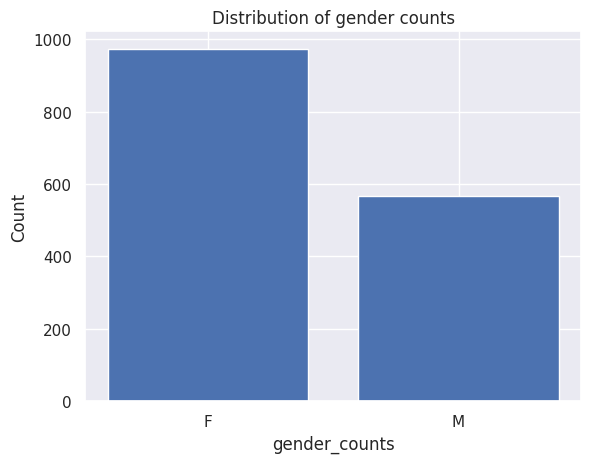

In [390]:
#create barpolt using Matplotlib
plt.bar(gender_counts.index,gender_counts.values)   #taking gender_counts and gender_counts.values
plt.xlabel('gender_counts')
plt.ylabel('Count')
plt.title('Distribution of gender counts') #setting the title
plt.show()

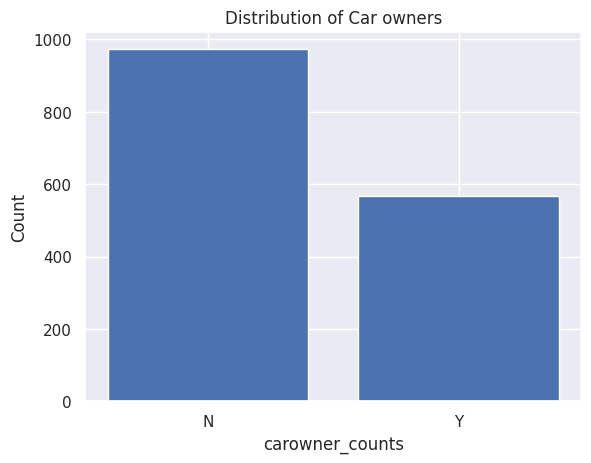

In [391]:
#create barpolt using Matplotlib on gender_counts
plt.bar(carowner_counts.index,gender_counts.values)
plt.xlabel('carowner_counts')  #taking car owner counts on x -axis
plt.ylabel('Count')  #taking the count on y axis
plt.title('Distribution of Car owners') #setting the title
plt.show()

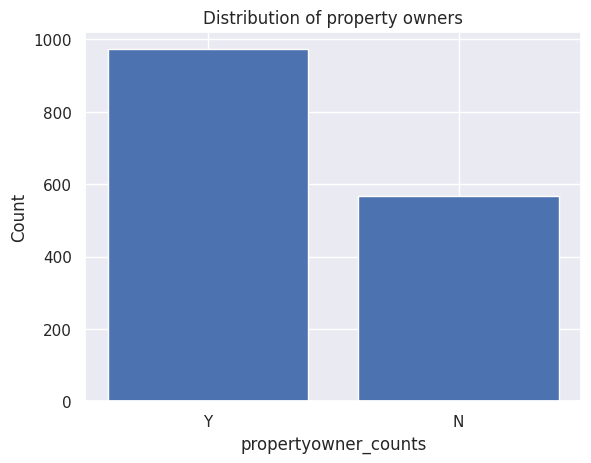

In [392]:
#create barpolt using Matplotlib on propertyowners
plt.bar(propertyowner_counts.index,gender_counts.values)
plt.xlabel('propertyowner_counts')
plt.ylabel('Count')
plt.title('Distribution of property owners')
plt.show()

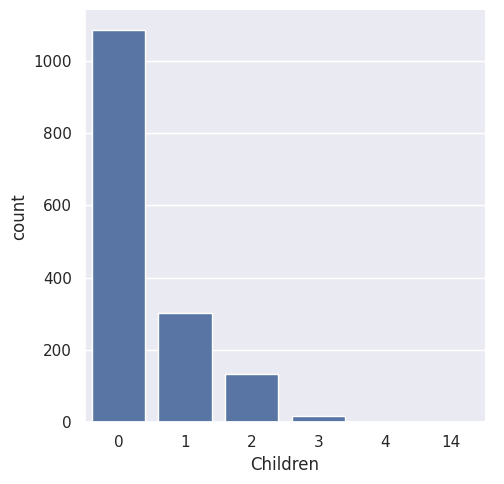

In [393]:
#create barpolt using seaborn on number of children
sns.catplot(data=merged_df, kind='count', x='Children')

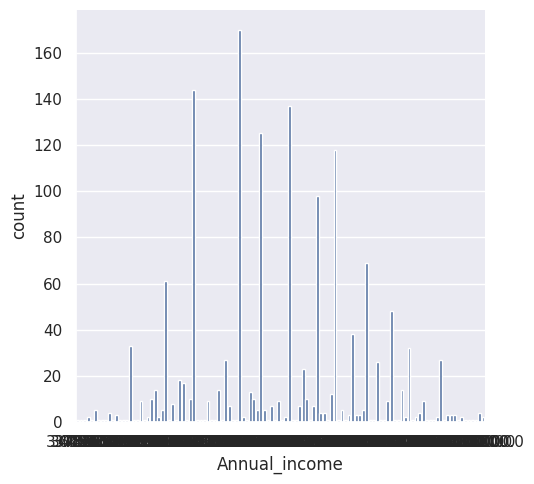

In [394]:
#create barpolt using  seaborn on annual income
sns.catplot(data=merged_df, kind='count', x='Annual_income')

([<matplotlib.patches.Wedge at 0x7f8348f63d00>,
 [Text(-0.05491934303904754, 1.0986281744795003, 'Working'),
  Text(-0.7325929856715023, -0.8205531776459793, 'Commercial associate'),
  Text(0.5820445829573612, -0.9333938629806775, 'Pensioner'),
  Text(1.0699071979998314, -0.2555358833278601, 'State servant')])

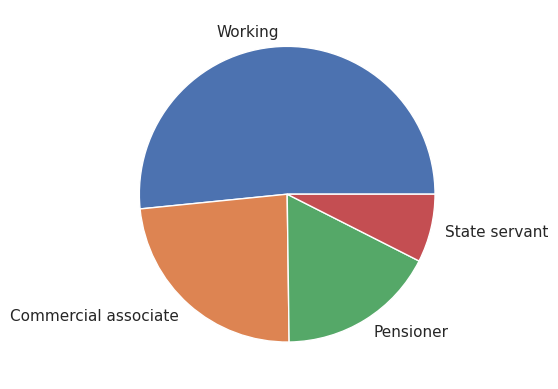

In [395]:
#plotting pie chart on type of income
plt.pie(merged_df['Type_Income'].value_counts().values, labels=merged_df['Type_Income'].value_counts().index)

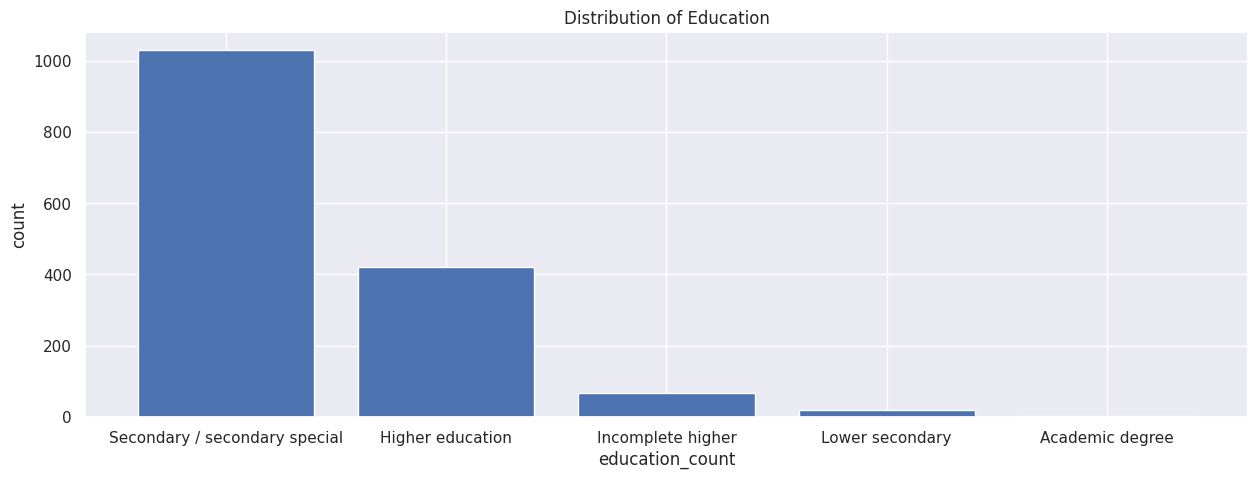

In [396]:
#create barpolt using Matplotlib on education count
plt.figure(figsize=(15,5))
plt.bar(education_count.index,education_count.values)
plt.xlabel('education_count')
plt.ylabel('count')
plt.title('Distribution of Education')
plt.show()

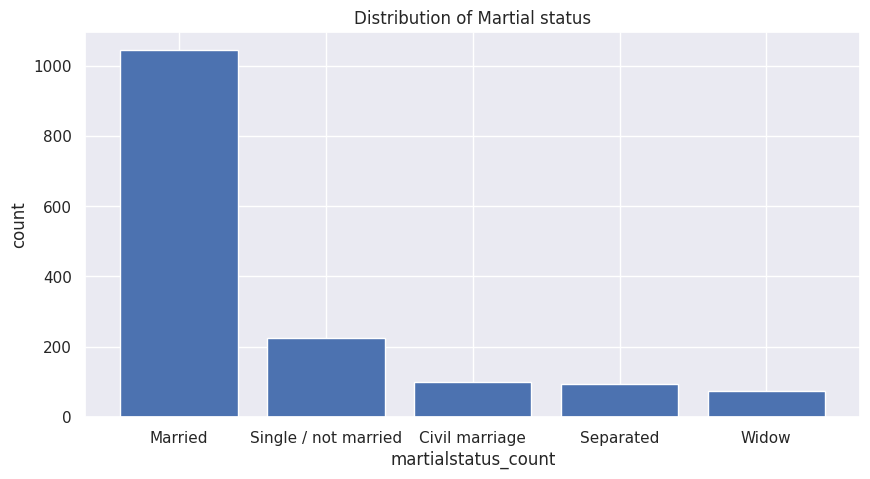

In [397]:
#create barpolt using Matplotlib on martial status
plt.figure(figsize=(10,5))
plt.bar(martialstatus_count.index,martialstatus_count.values)
plt.xlabel('martialstatus_count')
plt.ylabel('count')
plt.title('Distribution of Martial status')
plt.show()

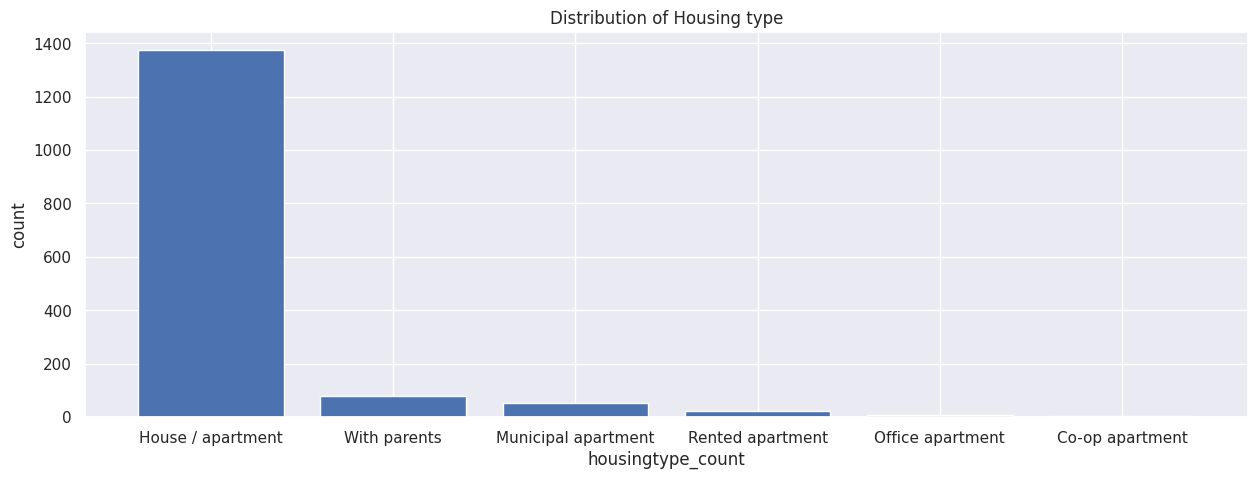

In [398]:
#create barpolt using Matplotlib on housing count
plt.figure(figsize=(15,5))
plt.bar(housingtype_count.index,housingtype_count.values)
plt.xlabel('housingtype_count')
plt.ylabel('count')
plt.title('Distribution of Housing type')
plt.show()

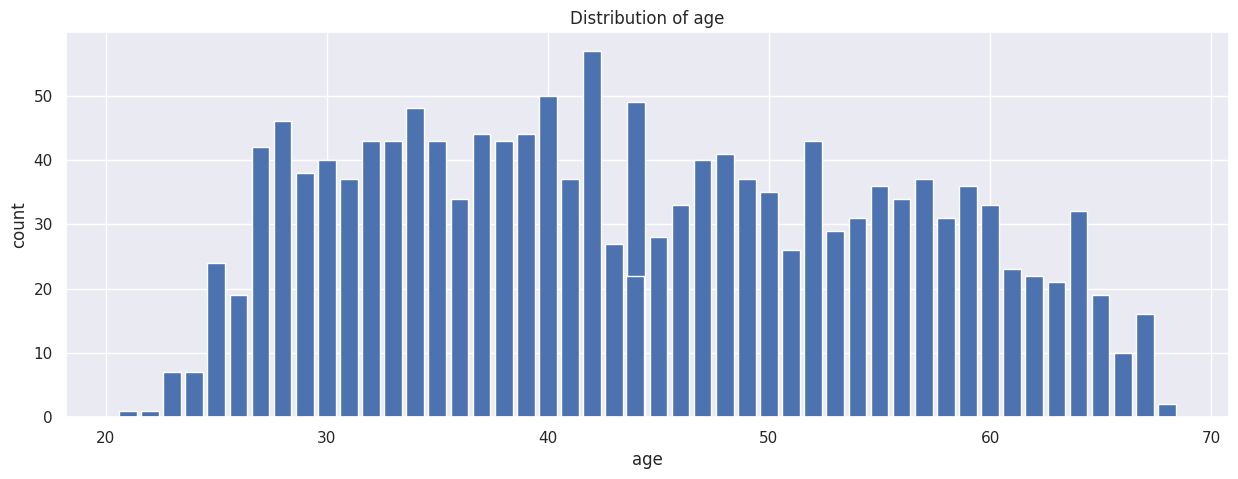

In [399]:
#create barpolt using Matplotlib on count of age
plt.figure(figsize=(15,5))
plt.bar(age.index,age.values)
plt.xlabel('age')
plt.ylabel('count')
plt.title('Distribution of age')
plt.show()

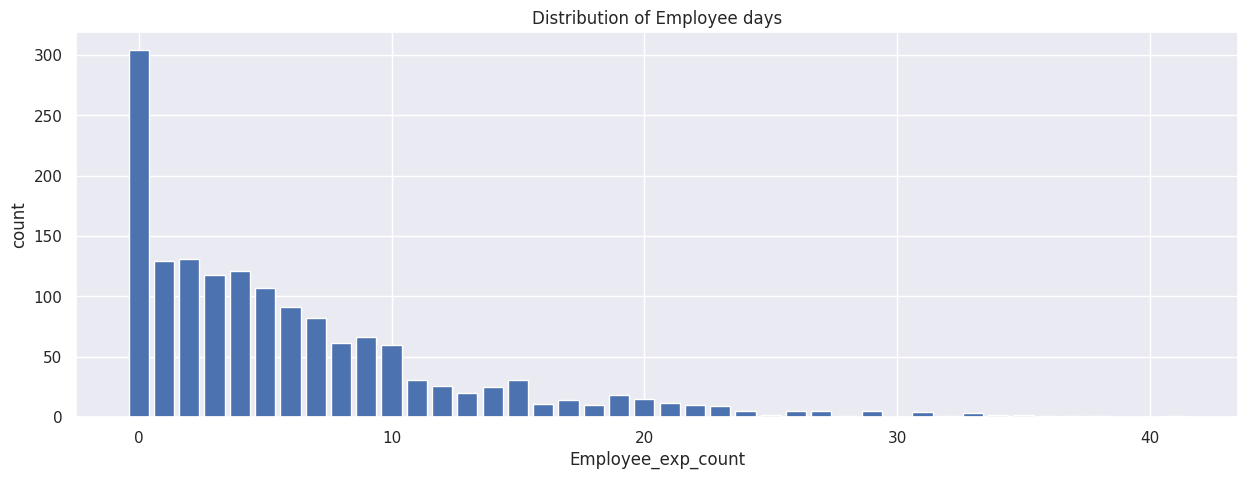

In [400]:
#create barpolt using Matplotlib on employee experience count
plt.figure(figsize=(15,5))
plt.bar(Employee_exp_count.index,Employee_exp_count.values)
plt.xlabel('Employee_exp_count')
plt.ylabel('count')
plt.title('Distribution of Employee days')
plt.show()

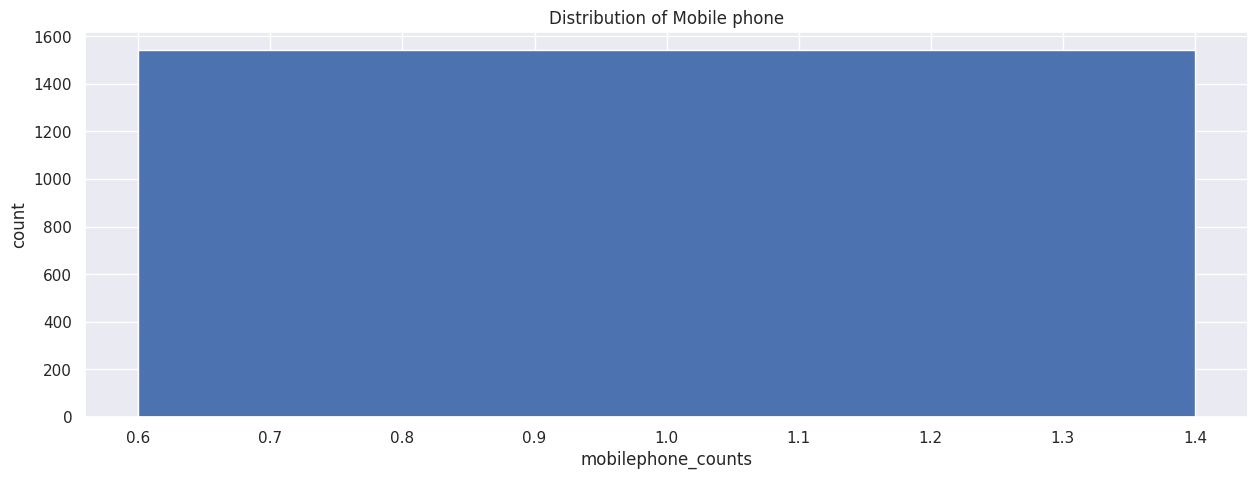

In [401]:
#create barpolt using Matplotlib on count of mobile phone
plt.figure(figsize=(15,5))
plt.bar(mobilephone_counts.index,mobilephone_counts.values)
plt.xlabel('mobilephone_counts')
plt.ylabel('count')
plt.title('Distribution of Mobile phone')
plt.show()

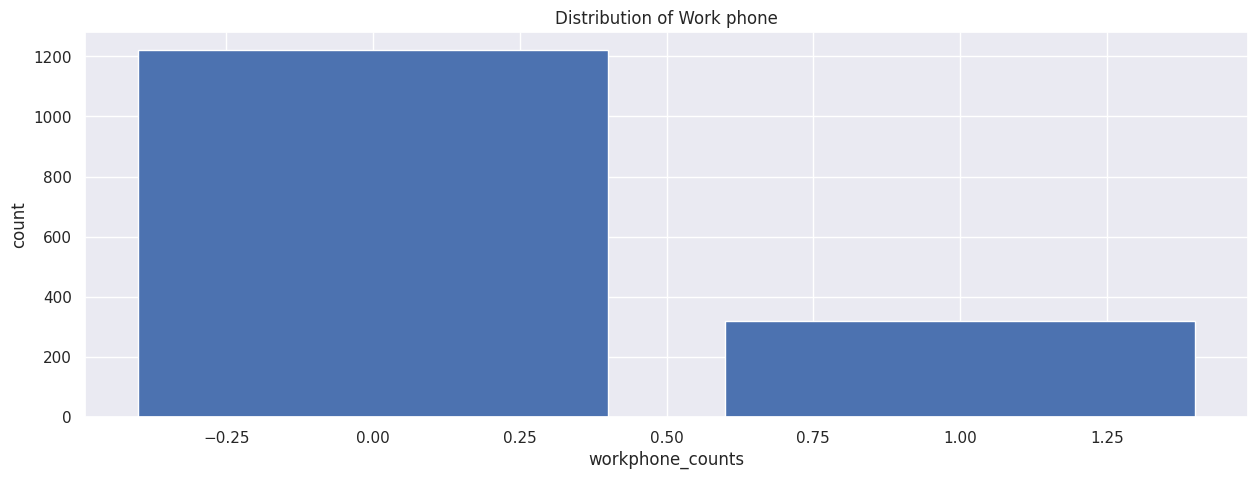

In [402]:
#create barpolt using Matplotlib on work phone counts
plt.figure(figsize=(15,5))
plt.bar(workphone_counts.index,workphone_counts.values)
plt.xlabel('workphone_counts')
plt.ylabel('count')
plt.title('Distribution of Work phone')
plt.show()

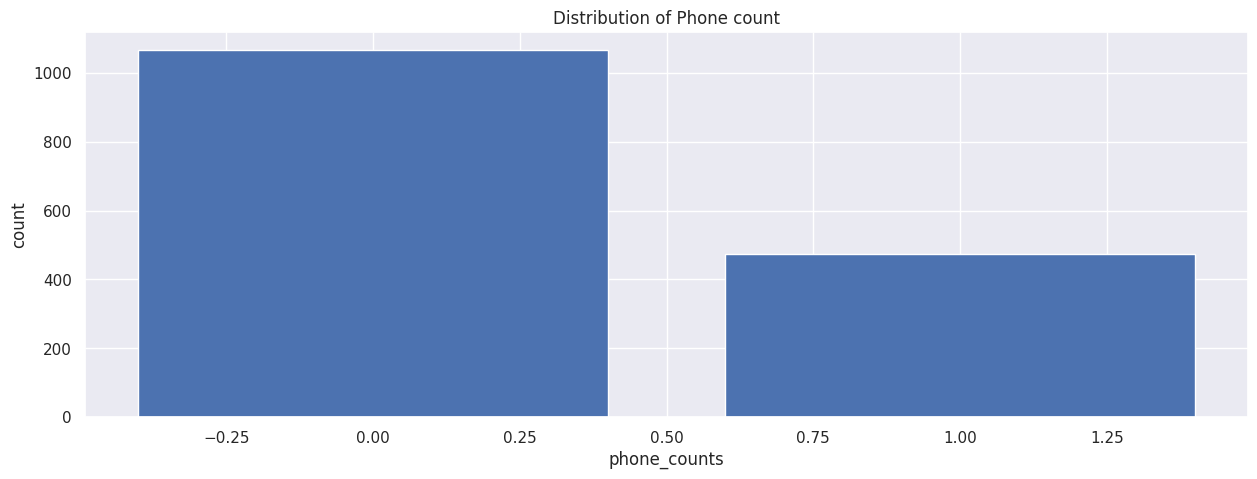

In [403]:
#create barpolt using Matplotlib on count of phone
plt.figure(figsize=(15,5))
plt.bar(phone_counts.index,phone_counts.values)
plt.xlabel('phone_counts')
plt.ylabel('count')
plt.title('Distribution of Phone count')
plt.show()

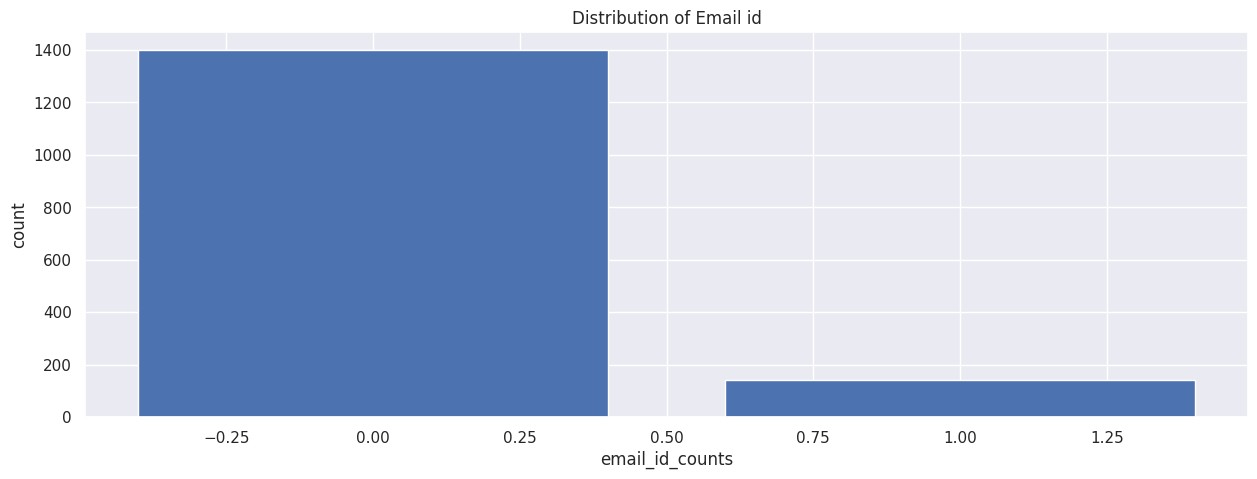

In [404]:
#create barpolt using Matplotlib on email id counts
plt.figure(figsize=(15,5))
plt.bar(email_id_counts.index,email_id_counts.values)
plt.xlabel('email_id_counts')
plt.ylabel('count')
plt.title('Distribution of Email id')
plt.show()

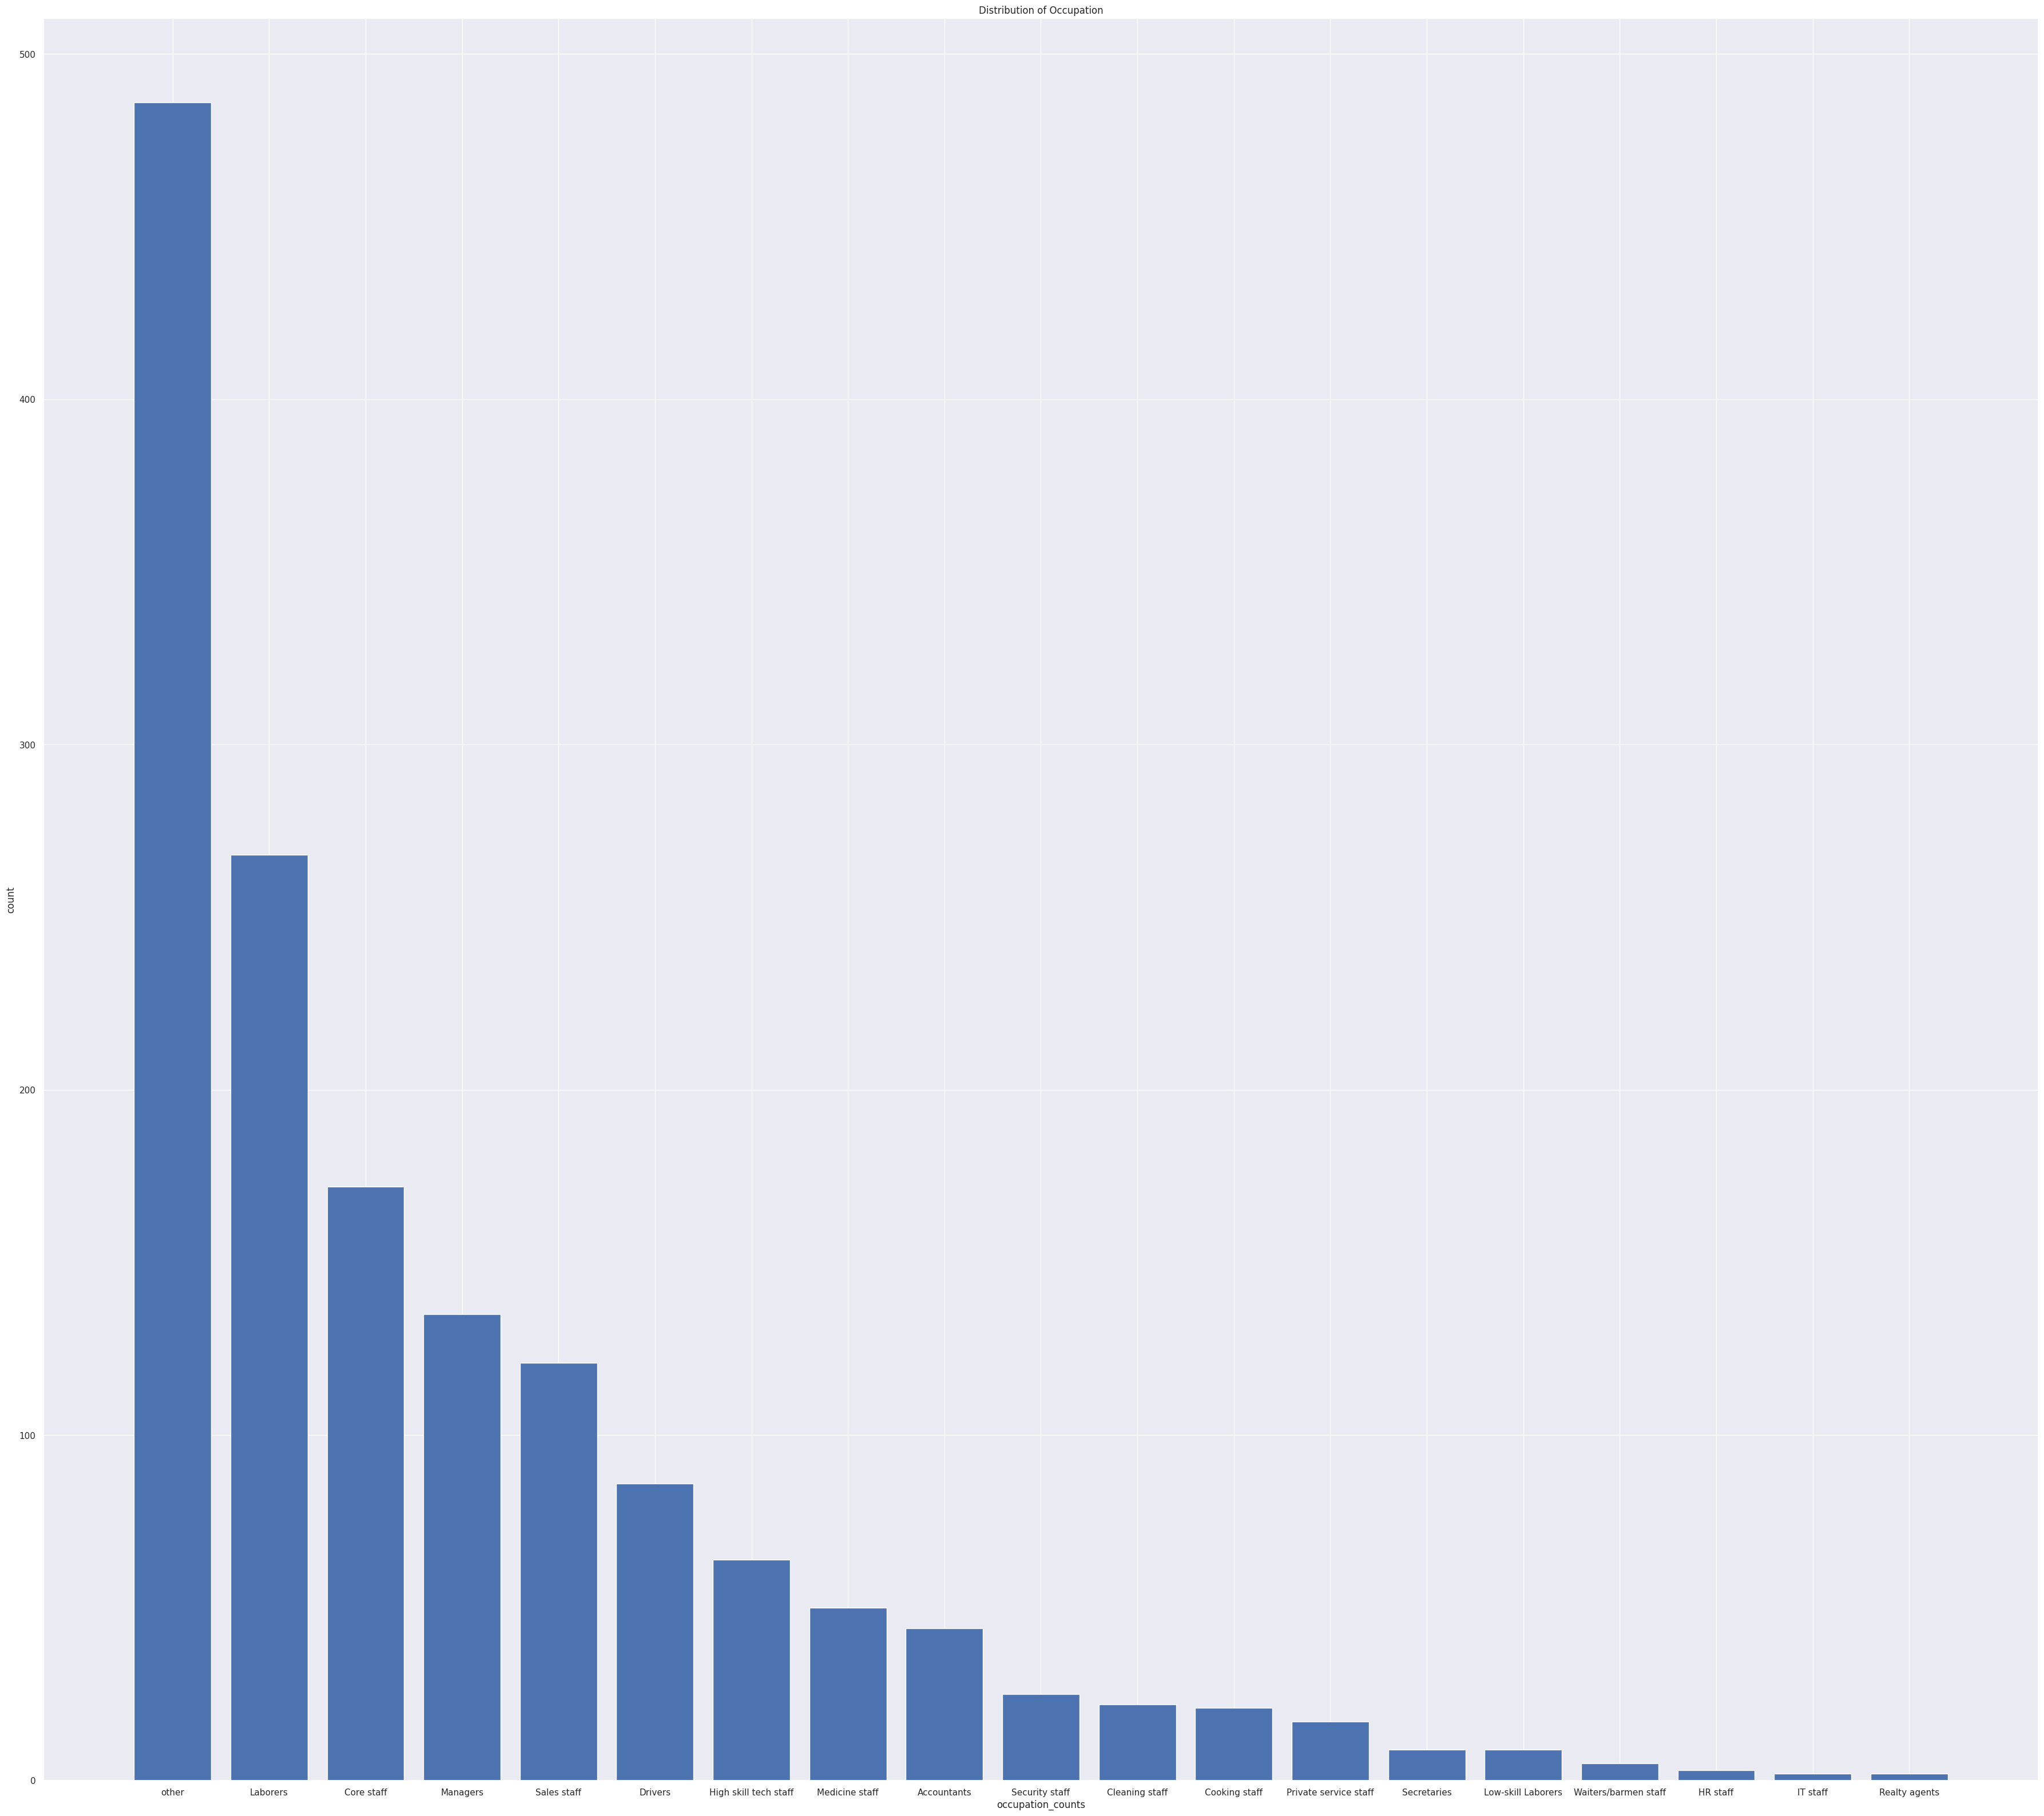

In [405]:
#create barpolt using Matplotlib on occupation count
plt.figure(figsize=(45,40))
plt.bar(occupation_counts.index,occupation_counts.values)
plt.xlabel('occupation_counts')
plt.ylabel('count')
plt.title('Distribution of Occupation')
plt.show()

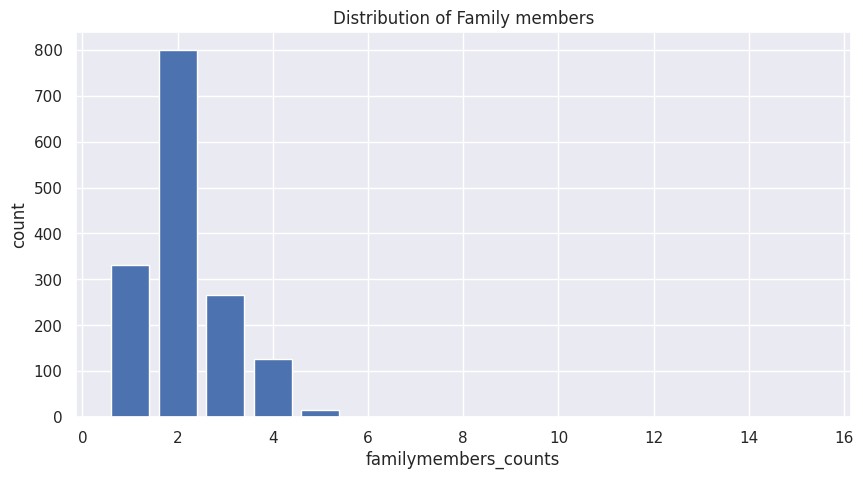

In [406]:
#create barpolt using Matplotlib on family member count
plt.figure(figsize=(10,5))
plt.bar(familymembers_counts.index,familymembers_counts.values)
plt.xlabel('familymembers_counts')
plt.ylabel('count')
plt.title('Distribution of Family members')
plt.show()

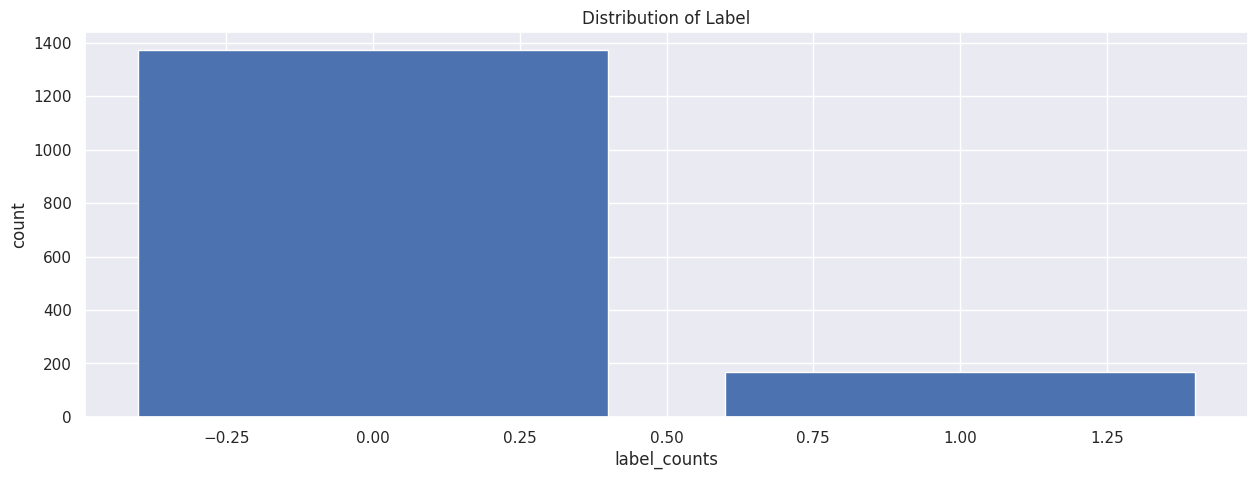

In [407]:
#create barpolt using Matplotlib on label count
plt.figure(figsize=(15,5))
plt.bar(label_counts.index,label_counts.values)
plt.xlabel('label_counts')
plt.ylabel('count')
plt.title('Distribution of Label')
plt.show()


TREATING OUTLIERS Treating outliers on annual income and employee experience using IQR.

<Axes: >

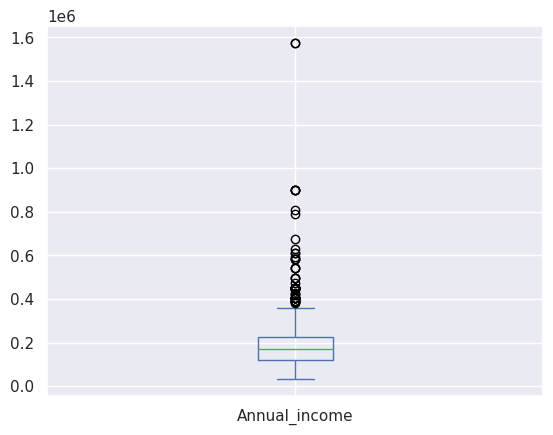

In [408]:
#detecting outliers
merged_df["Annual_income"].plot(kind="box")

In [409]:
#creating a copy of original dataframe so that data is not lost
merged_df_outlier=merged_df.copy()

In [410]:
#getting mathematical information of annual income
merged_df_outlier.describe()["Annual_income"]

count    1.541000e+03
mean     1.908057e+05
std      1.121136e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.710000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Annual_income, dtype: float64

In [411]:
#finding q1 and q3 for annual income
q1=merged_df_outlier.describe()["Annual_income"]["25%"]              #finding lower and upper quartile to treat outliers
q3=merged_df_outlier.describe()["Annual_income"]["75%"]              #finding lower and upper quartile to treat outliers

print(q1)
print(q3)

121500.0
225000.0


In [412]:
#finding interquartile range
IQR=q3-q1
print(IQR)

103500.0


In [413]:
#finding lower and upperlimit so that BMI should not go beyond these two.
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-33750.0
380250.0


In [414]:
#using clip to change the  column after treating with outlier
merged_df_outlier["Annual_income"]=merged_df_outlier["Annual_income"].clip(lower_limit,upper_limit)  #changing the  column after treating with outlier

<Axes: >

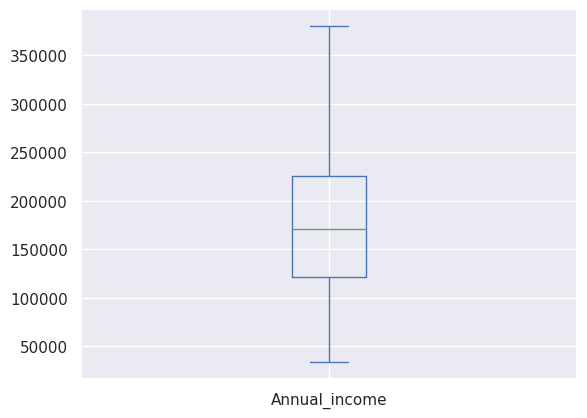

In [415]:
#graph after removing outliers
merged_df_outlier["Annual_income"].plot(kind="box")

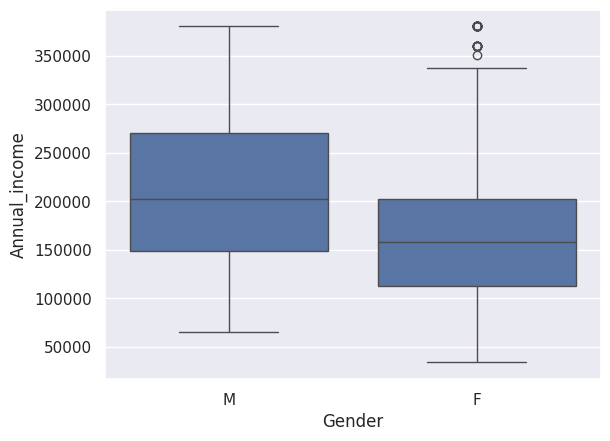

In [416]:
sns.boxplot(x =merged_df.Gender,y =merged_df_outlier.Annual_income)
plt.show()

<Axes: >

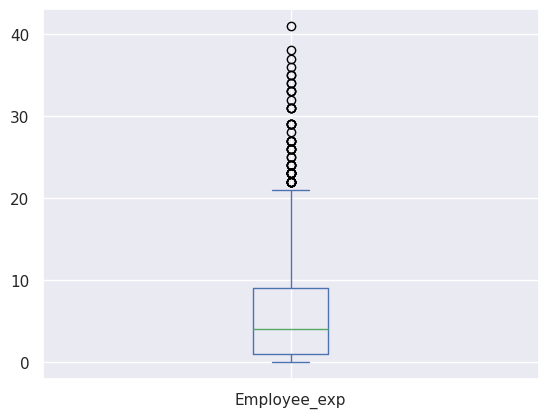

In [417]:
#treating outliers for employee experience
merged_df["Employee_exp"].plot(kind="box")

In [418]:
merged_df_outlier1=merged_df.copy()

In [419]:
merged_df_outlier1.describe()["Employee_exp"]

count    1541.000000
mean        6.075276
std         6.599256
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max        41.000000
Name: Employee_exp, dtype: float64

In [420]:
merged_df_outlier1.describe()["Employee_exp"]

count    1541.000000
mean        6.075276
std         6.599256
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max        41.000000
Name: Employee_exp, dtype: float64

In [421]:
q1=merged_df_outlier1.describe()["Employee_exp"]["25%"]              #finding lower and upper quartile to treat outliers
q3=merged_df_outlier1.describe()["Employee_exp"]["75%"]
print(q1)
print(q3)

1.0
9.0


In [422]:
IQR=q3-q1              #finding interquartile range
print(IQR)

8.0


In [423]:
lower_limit=q1-1.5*IQR        #finding lower and upperlimit so that BMI should not go beyond these two.
upper_limit=q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-11.0
21.0


In [424]:
lower_limit=q1-1.5*IQR        #finding lower and upperlimit so that BMI should not go beyond these two.
upper_limit=q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-11.0
21.0


In [425]:
merged_df_outlier1["Employee_exp"]=merged_df_outlier1["Employee_exp"].clip(lower_limit,upper_limit)  #changing the  column after treating with outlier

<Axes: >

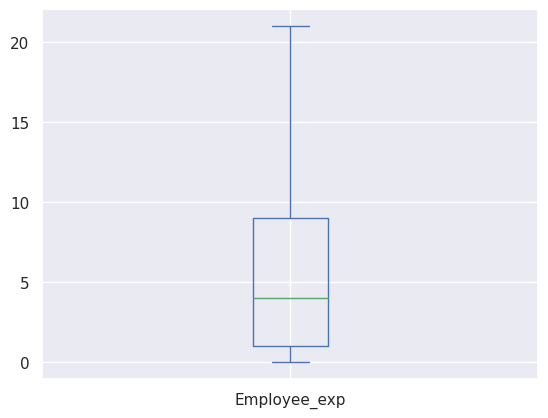

In [426]:
merged_df_outlier1["Employee_exp"].plot(kind="box")  #graph after removing outliers

Relation between categorical variables Plotting grah between categorical variables

In [427]:
merged_df.columns

Index(['Ind_id', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Age', 'Employee_exp', 'Mobile_phone', 'Work_Phone',
       'Phone', 'Email_id', 'Type_Occupation', 'Family_Members', 'label'],
      dtype='object')

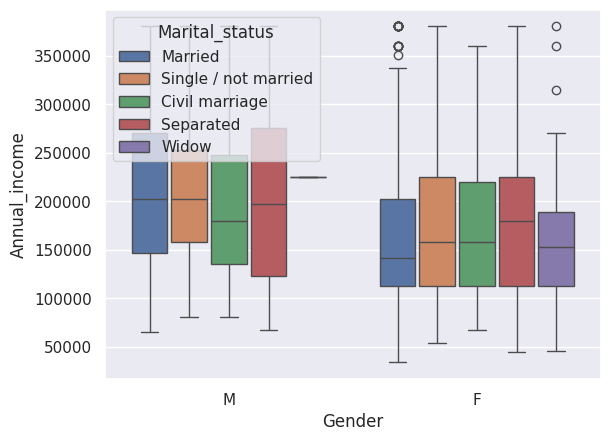

In [428]:
#visualizing boxplot between gender and annual income and annual income is from merged_df_outlier which is without outliers
sns.boxplot(x =merged_df.Gender,y =merged_df_outlier.Annual_income,hue=merged_df.Marital_status,gap=.1)
plt.show()

<Axes: xlabel='Gender', ylabel='Employee_exp'>

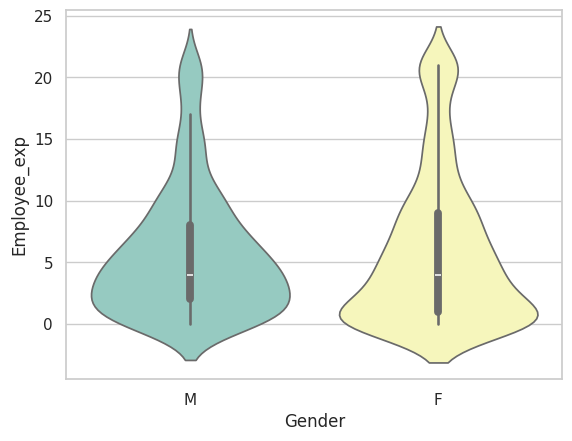

In [429]:
#visualizing violinplot between gender and employee experience which is without outliers
sns.set(style="whitegrid")
sns.violinplot(x =merged_df.Gender,y =merged_df_outlier1.Employee_exp,palette="Set3")

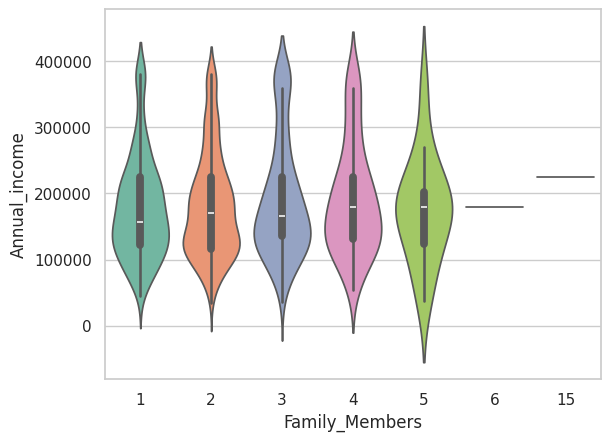

In [430]:
#visualizing violinplot between family members and annual income
sns.violinplot(x= merged_df.Family_Members,y =merged_df_outlier.Annual_income, palette="Set2")
plt.show()

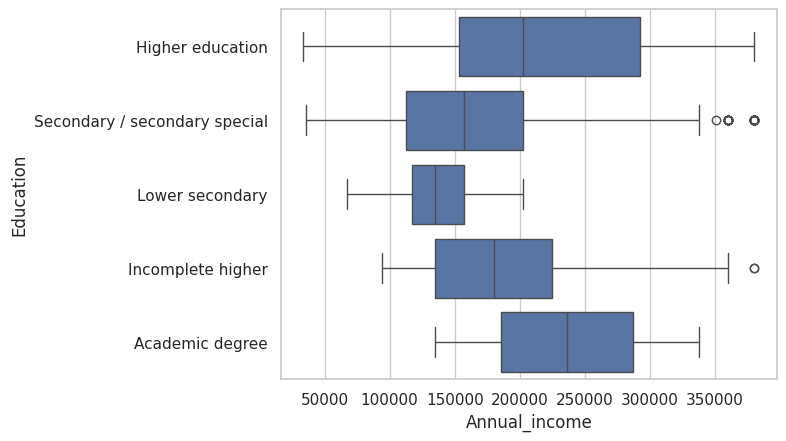

In [431]:
#visualizing boxplot between annual income and education and annual income is without outliers
sns.boxplot(x=merged_df_outlier.Annual_income,y =merged_df.Education)
plt.show()

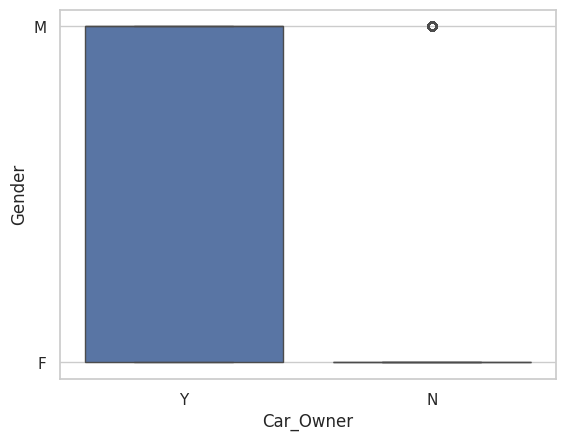

In [432]:
#visualizing boxplot between gender and car owners
sns.boxplot(x ='Car_Owner',y ="Gender",data=merged_df)
plt.show()

<Axes: xlabel='Annual_income', ylabel='Type_Occupation'>

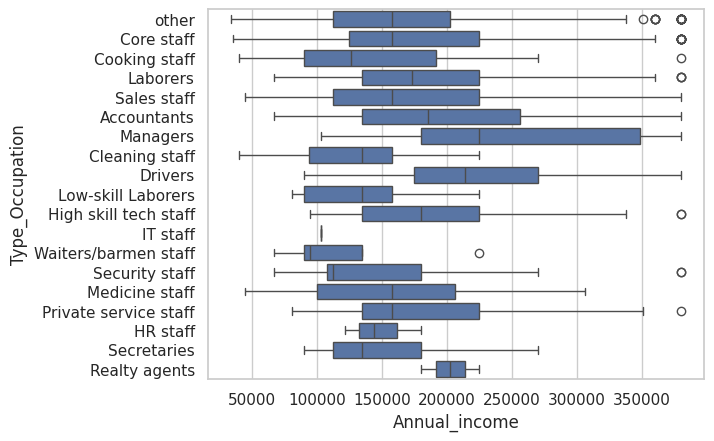

In [433]:
#visualizing boxplot between annual income (with less outliers or outliers have been treated) and type of occupation
sns.boxplot(x =merged_df_outlier.Annual_income,y =merged_df.Type_Occupation)

DATA ANALYSIS APPROACH

1)What approach are you going to take in order to prove or disprove your hypothesis?

HYPOTHESIS TESTING

1)Null Hpothesis:People with low annual income will not get credit card.

2)Alternate Hpothesis:People with low annual income can get credit card.

In [434]:
#finding cross rabulation between label and annual income
pd.crosstab(merged_df['label'],merged_df['Annual_income'])

Annual_income,33750.0,36000.0,37800.0,40500.0,44550.0,45000.0,45900.0,47250.0,49500.0,54000.0,...,540000.0,585000.0,594000.0,612000.0,630000.0,675000.0,787500.0,810000.0,900000.0,1575000.0
label,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,2,1,5,1,1,1,4,...,1,1,1,2,1,0,1,1,4,2
1,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,1,0,0,0,0


In [435]:
#locating the people who got acpproval for credit card
approval=merged_df.loc[merged_df.label==0]
approval.head()

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employee_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
175,5118538,F,N,Y,1,81000.0,Working,Secondary / secondary special,Married,Municipal apartment,43.0,17.0,1,1,1,0,Cleaning staff,3,0
176,5069057,M,Y,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,49.0,7.0,1,0,0,0,Laborers,2,0
177,5066689,F,N,Y,0,180000.0,Commercial associate,Higher education,Civil marriage,House / apartment,35.0,1.0,1,0,1,1,Sales staff,2,0
178,5086062,F,N,Y,0,135000.0,State servant,Secondary / secondary special,Married,House / apartment,56.0,26.0,1,0,1,0,Core staff,2,0
179,5113717,F,N,N,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,45.0,8.0,1,0,0,1,Private service staff,3,0


In [436]:
#locating the people who got rejected for credit card
rejected=merged_df.loc[merged_df.label==1]
rejected.head()

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employee_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.000000,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.000000,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,43.952818,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.000000,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.000000,2.0,1,1,1,0,other,2,1


In [437]:
approval.count()

Ind_id             1371
Gender             1371
Car_Owner          1371
Property_Owner     1371
Children           1371
Annual_income      1371
Type_Income        1371
Education          1371
Marital_status     1371
Housing_type       1371
Age                1371
Employee_exp       1371
Mobile_phone       1371
Work_Phone         1371
Phone              1371
Email_id           1371
Type_Occupation    1371
Family_Members     1371
label              1371
dtype: int64

In [438]:
rejected.count()

Ind_id             170
Gender             170
Car_Owner          170
Property_Owner     170
Children           170
Annual_income      170
Type_Income        170
Education          170
Marital_status     170
Housing_type       170
Age                170
Employee_exp       170
Mobile_phone       170
Work_Phone         170
Phone              170
Email_id           170
Type_Occupation    170
Family_Members     170
label              170
dtype: int64

In [439]:
#making rows of approved and rejected people same
rejected1=rejected[-170:]
charges_yes = approval.Annual_income #taking charges_yes for aproved people on annual income
charges_no = rejected.Annual_income  #taking charges_no for rejected people on annual income

In [440]:
rejected1.count()

Ind_id             170
Gender             170
Car_Owner          170
Property_Owner     170
Children           170
Annual_income      170
Type_Income        170
Education          170
Marital_status     170
Housing_type       170
Age                170
Employee_exp       170
Mobile_phone       170
Work_Phone         170
Phone              170
Email_id           170
Type_Occupation    170
Family_Members     170
label              170
dtype: int64

In [441]:
#finding the mean of annual income who have got approval and who got rejected
print('Annual income for people with credit card {} and people with no credit card is {} '.format(charges_yes.mean(),charges_no.mean()))

Annual income for people with credit card 190106.4641819421 and people with no credit card is 196445.26241080038 


[Text(0.5, 1.0, 'Annual income vs label')]

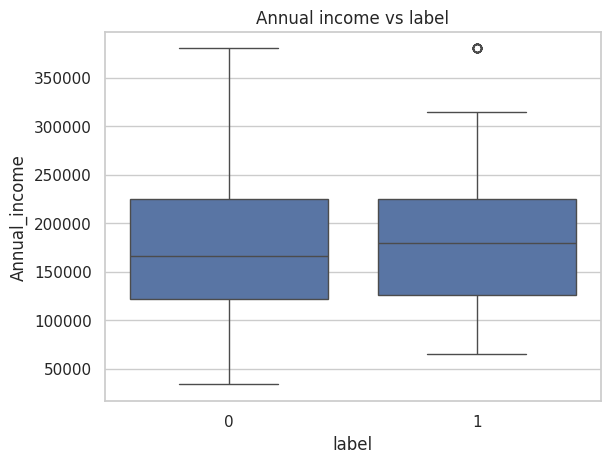

In [442]:
#plotting boxplot on annual income and label and taking annual income without outliers
sns.boxplot(x=merged_df.label,y=merged_df_outlier.Annual_income).set(title="Annual income vs label")

taking alpha=0.05

In [443]:
v1 = np.random.choice(charges_yes,size=100)
v2 = np.random.choice(charges_no,size=100)

res = ttest_ind(v1, v2)
print(res)

TtestResult(statistic=-1.2243634766934137, pvalue=0.22226991211709568, df=198.0)


since p value is greater than 0.05,null hypothesis cannot be rejected i.e people with low annual income will not be given credit card

FEATURE ENGINEERING

2)What feature engineering techniques will be relevant to your project?

I have converted Non Numeric data to Numeric data.

In [444]:
#converting non numeric to numeric
from sklearn.preprocessing import LabelEncoder  #Importing label encoder
le=LabelEncoder()
for col in merged_df:
  if merged_df[col].dtype=='object':
    merged_df[col]=le.fit_transform(merged_df[col])

In [445]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1541 non-null   int64  
 1   Gender           1541 non-null   int64  
 2   Car_Owner        1541 non-null   int64  
 3   Property_Owner   1541 non-null   int64  
 4   Children         1541 non-null   int64  
 5   Annual_income    1541 non-null   float64
 6   Type_Income      1541 non-null   int64  
 7   Education        1541 non-null   int64  
 8   Marital_status   1541 non-null   int64  
 9   Housing_type     1541 non-null   int64  
 10  Age              1541 non-null   float64
 11  Employee_exp     1541 non-null   float64
 12  Mobile_phone     1541 non-null   int64  
 13  Work_Phone       1541 non-null   int64  
 14  Phone            1541 non-null   int64  
 15  Email_id         1541 non-null   int64  
 16  Type_Occupation  1541 non-null   int64  
 17  Family_Members   15

In [446]:
merged_df.shape

(1541, 19)

MODEL BUILDING

1)Splitted the data.

2)Then did feature scaling.

3)Used 4 models to compare the accuracy.

4)Did cross validation to check accuracy of model.

In [447]:
X=merged_df.drop(columns="label",axis=1)   #independent
y=merged_df["label"]  #dependent

In [448]:
#split the data into train and test
#80% train and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)#random_state is for reproducibility

In [449]:
#counting number of rows for X_test
X_test.shape

(309, 18)

In [450]:
#counting number of rows for y_test
y_test.shape

(309,)

In [451]:
#counting number of rows for X_train
X_train.shape

(1232, 18)

In [452]:
#counting number of rows for y_train
y_train.shape

(1232,)

In [453]:
merged_df_norm=merged_df.copy()

FEATURE SCALING Used MinMaxScaler and scaled the data to range of 0 and 1.

In [454]:
from sklearn.preprocessing import MinMaxScaler #using MinMax function
mms=MinMaxScaler() #creating object of function
scaled_values=mms.fit_transform(merged_df)  #using fittransform to fill the values with scaled values

In [455]:
merged_df_norm.head()

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employee_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.00000,1,1,1,1,51.000000,0.0,1,0,0,0,18,2,1
1,5009744,0,1,0,0,315000.00000,0,1,1,1,37.000000,2.0,1,1,1,0,18,2,1
2,5009746,0,1,0,0,315000.00000,0,1,1,1,43.952818,2.0,1,1,1,0,18,2,1
3,5009749,0,1,0,0,191399.32623,0,1,1,1,37.000000,2.0,1,1,1,0,18,2,1
4,5009752,0,1,0,0,315000.00000,0,1,1,1,37.000000,2.0,1,1,1,0,18,2,1


In [456]:
scaled_values

array([[0.        , 1.        , 1.        , ..., 1.        , 0.07142857,
        1.        ],
       [0.00647667, 0.        , 1.        , ..., 1.        , 0.07142857,
        1.        ],
       [0.0064908 , 0.        , 1.        , ..., 1.        , 0.07142857,
        1.        ],
       ...,
       [0.75689515, 1.        , 1.        , ..., 0.55555556, 0.21428571,
        0.        ],
       [0.77262422, 1.        , 1.        , ..., 0.22222222, 0.07142857,
        0.        ],
       [0.31756895, 0.        , 1.        , ..., 1.        , 0.07142857,
        0.        ]])

In [457]:
nn_data=pd.DataFrame(scaled_values,columns=merged_df.columns)

In [458]:
nn_data.head(5)

,Ind_id,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employee_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,0.000000,1.0,1.0,1.0,0.0,0.094891,0.333333,0.25,0.25,0.2,0.638298,0.00000,0.0,0.0,0.0,0.0,1.0,0.071429,1.0
1,0.006477,0.0,1.0,0.0,0.0,0.182482,0.000000,0.25,0.25,0.2,0.340426,0.04878,0.0,1.0,1.0,0.0,1.0,0.071429,1.0
2,0.006491,0.0,1.0,0.0,0.0,0.182482,0.000000,0.25,0.25,0.2,0.488358,0.04878,0.0,1.0,1.0,0.0,1.0,0.071429,1.0
3,0.006512,0.0,1.0,0.0,0.0,0.102287,0.000000,0.25,0.25,0.2,0.340426,0.04878,0.0,1.0,1.0,0.0,1.0,0.071429,1.0
4,0.006533,0.0,1.0,0.0,0.0,0.182482,0.000000,0.25,0.25,0.2,0.340426,0.04878,0.0,1.0,1.0,0.0,1.0,0.071429,1.0


In [459]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescale_X_train = scaler.fit_transform(X_train)
rescale_X_test = scaler.fit_transform(X_test)
print(rescale_X_train.shape)
print(rescale_X_test.shape)

(1232, 18)
(309, 18)


3)Please justify your data analysis approach. I have removed the outliers and treated them using IQR and then did Normalization and made the range 0 to 1.Also , I have used labelencoder to convert non numeric data to numeric data.

4) Identify important patterns in your data using the EDA approach to justify your findings.

i)Merged the two dataframes and created into one dataframe on common column.Performed some functions on dataframe. Changed the names of columns according to the requirement.Found mathematical relation between columns of dataframe.Also found the information about data types.Changed the age and employement days columns to positive.

ii)Cleaned the data: Found null values. Filled the null values with mean. Visualized the non null values through heatmap.Counted the values of each column.

iii)Analysed the data and plotted the graph between numerical and categorical data and also plotted the graph between categorical data. Plotted bar,box,violin plots and visualised the data . Also plotted heatmap for for correlation between dataframe.

MACHINE LEARNING APPROACH

1)What method will you use for machine learning based predictions for credit card approval?

Ans:Logistic regression will be performed as it is categorical data.

Splitted the data into training and testing sets and evaluated models.

Performed 4 models to find accuracy of data.

Trained the model and did cross validation of each models.

Found the confusion matrix,accuracy score,precision score for each model.

2)Please justify the most appropriate model.

i)Linear Regression-0.89

ii)Decision Tree Classifier-0.847

iii)RandomForestClassifier-0.93

iv)XGBoost Classifier-0.92

As accuracy score for Random forest is the highest,it is the most appropriate model.

MODEL TRAINING Used for models to test the accuracy.

**LOGISTIC REGRESSION**

In [460]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(X_train,y_train)         #80% for training

LogisticRegression()

In [461]:
y_pred=log_r.predict(X_test) #finding predicted value for y

In [462]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [463]:
y_test

900     0
1000    0
990     0
1498    0
1514    0
       ..
1485    0
409     0
445     0
421     0
808     0
Name: label, Length: 309, dtype: int64

In [464]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
print(confusion_matrix(y_test,y_pred))  #finding confusion matrix

[[276   0]
 [ 33   0]]


In [465]:
print(accuracy_score(y_test,y_pred)) #finding accuracy score

0.8932038834951457


In [466]:
print(precision_score(y_test,y_pred)) #finding precision score

0.0


CROSS VALIDATION

In [467]:
from sklearn.model_selection import ShuffleSplit
model=LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.87055016 0.89320388 0.8802589  0.84142395 0.91585761 0.91262136
 0.88349515 0.85760518 0.91585761 0.88996764]
0.8860841423948219


DECISION TREE CLASSIFIER

In [468]:
from sklearn.tree import DecisionTreeClassifier
df=DecisionTreeClassifier()
df.fit(X_train,y_train)

DecisionTreeClassifier()

In [469]:
y_pred1=df.predict(X_test)


In [470]:
print(confusion_matrix(y_test,y_pred1))

[[248  28]
 [ 19  14]]


In [471]:
print(accuracy_score(y_test,y_pred1))

0.8478964401294499


In [472]:
print(precision_score(y_test,y_pred1))

0.3333333333333333


CROSS VALIDATION

In [473]:
from sklearn.model_selection import ShuffleSplit
model=DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.86407767 0.87378641 0.85113269 0.84142395 0.86084142 0.84466019
 0.84466019 0.88349515 0.85760518 0.87702265]
0.8598705501618122


RANDOMFORESTCLASSIFIER

In [474]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [475]:
y_pred2=rf.predict(X_test)

In [476]:
print(confusion_matrix(y_test,y_pred2))

[[275   1]
 [ 20  13]]


In [477]:
print(accuracy_score(y_test,y_pred2))


0.9320388349514563


In [478]:
print(precision_score(y_test,y_pred2))

0.9285714285714286


CROSS VALIDATION

In [479]:
from sklearn.model_selection import ShuffleSplit
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.91585761 0.93851133 0.92556634 0.93527508 0.93851133 0.92880259
 0.92556634 0.93527508 0.90291262 0.9223301 ]
0.9268608414239482


XGBOOSTCLASSIFIER

In [480]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [481]:
y_pred3=xgb.predict(X_test)

In [482]:
print(confusion_matrix(y_test,y_pred3))

[[273   3]
 [ 21  12]]


In [483]:
print(accuracy_score(y_test,y_pred3))

0.9223300970873787


In [484]:
print(precision_score(y_test,y_pred3))

0.8


CROSS VALIDATION

In [485]:
from sklearn.model_selection import ShuffleSplit
model=XGBClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.9223301  0.9223301  0.93203883 0.95145631 0.9223301  0.93203883
 0.93203883 0.93851133 0.87702265 0.94174757]
0.9271844660194176


3)Please perform necessary steps required to improve the accuracy of your model. Performed cross validation for each model.

4)Please compare all models (at least 4 models).

i)Linear Regression-0.89

ii)Decision Tree Classifier-0.847

iii)RandomForestClassifier-0.93

iv)XGBoost Classifier-*0.92 **

As accuracy score for** Random forest** is the highest,it is the most appropriate model.

SQL QUERIES

In [486]:
import duckdb
con = duckdb.connect()


In [487]:
s_table=duckdb.sql("SELECT * FROM merged_df")
print(s_table)

┌─────────┬────────┬───────────┬────────────────┬───┬───────┬──────────┬─────────────────┬────────────────┬───────┐
│ Ind_id  │ Gender │ Car_Owner │ Property_Owner │ … │ Phone │ Email_id │ Type_Occupation │ Family_Members │ label │
│  int64  │ int64  │   int64   │     int64      │   │ int64 │  int64   │      int64      │     int64      │ int64 │
├─────────┼────────┼───────────┼────────────────┼───┼───────┼──────────┼─────────────────┼────────────────┼───────┤
│ 5008827 │      1 │         1 │              1 │ … │     0 │        0 │              18 │              2 │     1 │
│ 5009744 │      0 │         1 │              0 │ … │     1 │        0 │              18 │              2 │     1 │
│ 5009746 │      0 │         1 │              0 │ … │     1 │        0 │              18 │              2 │     1 │
│ 5009749 │      0 │         1 │              0 │ … │     1 │        0 │              18 │              2 │     1 │
│ 5009752 │      0 │         1 │              0 │ … │     1 │        0 │

In [488]:
#1)Group the customers based on their income type and find the average of their annual income.
duckdb.query("SELECT Type_Income, AVG(Annual_income) AS avg_income FROM s_table GROUP BY Type_Income")

┌─────────────┬────────────────────┐
│ Type_Income │     avg_income     │
│    int64    │       double       │
├─────────────┼────────────────────┤
│           0 │ 233676.90826878042 │
│           2 │  210130.4347826087 │
│           1 │ 155093.62473752073 │
│           3 │ 180375.17558304983 │
└─────────────┴────────────────────┘

In [489]:
#2)Find the female owners of cars and property.
duckdb.query("SELECT * FROM s_table WHERE GENDER = 0 AND Car_Owner = 1 AND Property_Owner = 1")

┌─────────┬────────┬───────────┬────────────────┬───┬───────┬──────────┬─────────────────┬────────────────┬───────┐
│ Ind_id  │ Gender │ Car_Owner │ Property_Owner │ … │ Phone │ Email_id │ Type_Occupation │ Family_Members │ label │
│  int64  │ int64  │   int64   │     int64      │   │ int64 │  int64   │      int64      │     int64      │ int64 │
├─────────┼────────┼───────────┼────────────────┼───┼───────┼──────────┼─────────────────┼────────────────┼───────┤
│ 5018498 │      0 │         1 │              1 │ … │     1 │        0 │               2 │              2 │     1 │
│ 5018501 │      0 │         1 │              1 │ … │     1 │        0 │               2 │              2 │     1 │
│ 5018503 │      0 │         1 │              1 │ … │     1 │        0 │               2 │              2 │     1 │
│ 5024213 │      0 │         1 │              1 │ … │     1 │        0 │              18 │              2 │     1 │
│ 5036660 │      0 │         1 │              1 │ … │     0 │        0 │

In [490]:
#3)Find the male customers who are staying with their families.
duckdb.query("SELECT * FROM s_table WHERE GENDER = 1 AND Family_Members > 1")

┌─────────┬────────┬───────────┬────────────────┬───┬───────┬──────────┬─────────────────┬────────────────┬───────┐
│ Ind_id  │ Gender │ Car_Owner │ Property_Owner │ … │ Phone │ Email_id │ Type_Occupation │ Family_Members │ label │
│  int64  │ int64  │   int64   │     int64      │   │ int64 │  int64   │      int64      │     int64      │ int64 │
├─────────┼────────┼───────────┼────────────────┼───┼───────┼──────────┼─────────────────┼────────────────┼───────┤
│ 5008827 │      1 │         1 │              1 │ … │     0 │        0 │              18 │              2 │     1 │
│ 5010864 │      1 │         1 │              1 │ … │     1 │        1 │               3 │              3 │     1 │
│ 5010868 │      1 │         1 │              1 │ … │     1 │        1 │               3 │              3 │     1 │
│ 5021303 │      1 │         0 │              0 │ … │     0 │        1 │              18 │              3 │     1 │
│ 5021310 │      1 │         0 │              1 │ … │     0 │        0 │

In [491]:
#4)Please list the top five people having the highest income.
duckdb.query("SELECT * FROM s_table ORDER BY Annual_income DESC LIMIT 5")

┌─────────┬────────┬───────────┬────────────────┬───┬───────┬──────────┬─────────────────┬────────────────┬───────┐
│ Ind_id  │ Gender │ Car_Owner │ Property_Owner │ … │ Phone │ Email_id │ Type_Occupation │ Family_Members │ label │
│  int64  │ int64  │   int64   │     int64      │   │ int64 │  int64   │      int64      │     int64      │ int64 │
├─────────┼────────┼───────────┼────────────────┼───┼───────┼──────────┼─────────────────┼────────────────┼───────┤
│ 5143231 │      0 │         1 │              1 │ … │     0 │        0 │              10 │              2 │     0 │
│ 5143235 │      0 │         1 │              1 │ … │     0 │        0 │              10 │              2 │     0 │
│ 5090470 │      1 │         0 │              1 │ … │     0 │        0 │               8 │              3 │     0 │
│ 5079016 │      1 │         1 │              1 │ … │     0 │        0 │              10 │              4 │     0 │
│ 5079017 │      1 │         1 │              1 │ … │     0 │        0 │

In [492]:
#5)How many married people are having bad credit?
#As they have been rejected for the credit card ,therefore they have bad credit so taking label as 1.
duckdb.query("SELECT COUNT(*) FROM s_table WHERE 	Marital_status = 1 AND label = 1")

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│          110 │
└──────────────┘

In [493]:
#6)What is the highest education level and what is the total count?
duckdb.query("SELECT education, COUNT(*) AS count FROM s_table GROUP BY education ORDER BY count DESC LIMIT 1")

┌───────────┬───────┐
│ Education │ count │
│   int64   │ int64 │
├───────────┼───────┤
│         4 │  1029 │
└───────────┴───────┘

In [494]:
#7)Between married males and females, who is having more bad credit?
#Married males
duckdb.query("SELECT COUNT(*) FROM s_table WHERE 	Marital_status = 1 AND label = 1 AND Gender=1")

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│           51 │
└──────────────┘

In [495]:
#7)Between married males and females, who is having more bad credit?
#Married female
duckdb.query("SELECT COUNT(*) FROM s_table WHERE 	Marital_status = 1 AND label = 1 AND Gender=0")

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│           59 │
└──────────────┘

**51 Married males have bad credit
and 59 married females have bad credit.**
